In [69]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [70]:
import pandas as pd
import seaborn as sns
import missingno as msno
dataset = pd.read_csv('/content/gdrive/My Drive/Customer Data Analysis ML Models/Customer Churn Prediction/Churn Data/Customer Churn Full Dataset.csv')

In [71]:
dataset=dataset.drop(["NumberOfDeviceRegistered","SatisfactionScore","Complain","CouponUsed","DaySinceLastOrder","CashbackAmount"],axis='columns')
dataset.head()

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount
0,50001,1,Female,Laptop & Accessory,Single,9,1.0
1,50002,1,Male,Mobile & Accessory,Single,7,1.0
2,50003,1,Male,Mobile & Accessory,Single,6,1.0
3,50004,1,Male,Laptop & Accessory,Single,8,1.0
4,50005,1,Male,Mobile & Accessory,Single,3,1.0


In [72]:
dataset.shape

(5630, 7)

In [73]:
dataset.columns

Index(['CustomerID', 'Churn', 'Gender', 'PreferedOrderCat', 'MaritalStatus',
       'NumberOfAddress', 'OrderCount'],
      dtype='object')

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5630 non-null   int64  
 1   Churn             5630 non-null   int64  
 2   Gender            5630 non-null   object 
 3   PreferedOrderCat  5630 non-null   object 
 4   MaritalStatus     5630 non-null   object 
 5   NumberOfAddress   5630 non-null   int64  
 6   OrderCount        5372 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 308.0+ KB


In [75]:
dataset.describe()

,CustomerID,Churn,NumberOfAddress,OrderCount
count,5630.000000,5630.000000,5630.000000,5372.000000
mean,52815.500000,0.168384,4.214032,3.008004
std,1625.385339,0.374240,2.583586,2.939680
min,50001.000000,0.000000,1.000000,1.000000
25%,51408.250000,0.000000,2.000000,1.000000
50%,52815.500000,0.000000,3.000000,2.000000
75%,54222.750000,0.000000,6.000000,3.000000
max,55630.000000,1.000000,22.000000,16.000000


# **Handle Missing Value**

In [76]:
df=dataset

In [77]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

OrderCount
the total null values are: 258
the datatype is float64



In [78]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [79]:
dataset=df

In [80]:
df1=df.drop(["CustomerID"],axis='columns')

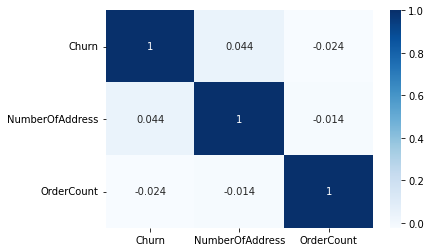

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df1.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

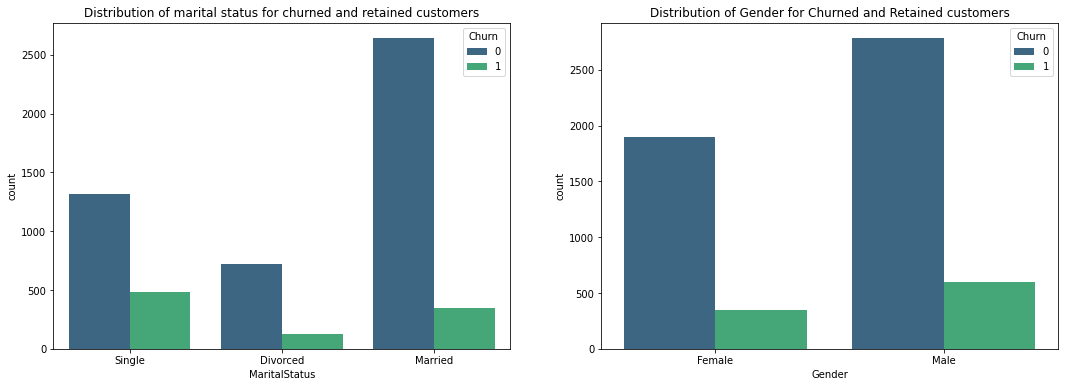

In [82]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
 
# fig.suptitle('Geeksforgeeks - 2 x 3 axes Box plot with data')
sns.countplot(ax=axes[0], x='MaritalStatus', hue='Churn', palette='viridis', data=dataset).set(title='Distribution of marital status for churned and retained customers')
sns.countplot(ax=axes[1],x='Gender', hue='Churn', palette='viridis', data=dataset).set(title="Distribution of Gender for Churned and Retained customers")
plt.show()

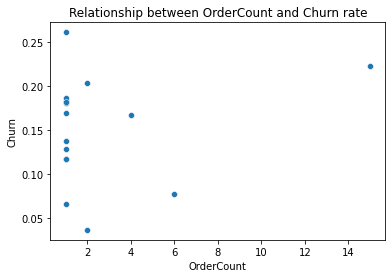

In [83]:
sns.scatterplot(x=dataset['OrderCount'],y=dataset.groupby('OrderCount').Churn.mean())
plt.title("Relationship between OrderCount and Churn rate")
plt.show()

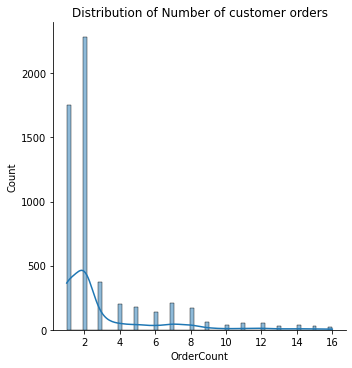

In [84]:
sns.displot(x='OrderCount', kde=True, data=dataset)
plt.title("Distribution of Number of customer orders")
plt.show()

# **Dataset Prepoceissing**

In [85]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])

In [86]:
dataset.head(2)

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount
0,50001,1,0,Laptop & Accessory,Single,9,1.0
1,50002,1,1,Mobile & Accessory,Single,7,1.0


In [87]:
df_encoded=dataset.copy()
df_encoded.head()

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount
0,50001,1,0,Laptop & Accessory,Single,9,1.0
1,50002,1,1,Mobile & Accessory,Single,7,1.0
2,50003,1,1,Mobile & Accessory,Single,6,1.0
3,50004,1,1,Laptop & Accessory,Single,8,1.0
4,50005,1,1,Mobile & Accessory,Single,3,1.0


In [88]:
dumies1 = pd.get_dummies(dataset['PreferedOrderCat'])
dumies2 = pd.get_dummies(dataset['MaritalStatus'])

In [89]:
dumies1.head(5)

,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [90]:
dumies2.head(5)

,Divorced,Married,Single
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [91]:
marged=pd.concat([dataset,dumies1,dumies2],axis='columns')

In [92]:
marged.head(5)

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
0,50001,1,0,Laptop & Accessory,Single,9,1.0,0,0,1,0,0,0,0,0,1
1,50002,1,1,Mobile & Accessory,Single,7,1.0,0,0,0,1,0,0,0,0,1
2,50003,1,1,Mobile & Accessory,Single,6,1.0,0,0,0,1,0,0,0,0,1
3,50004,1,1,Laptop & Accessory,Single,8,1.0,0,0,1,0,0,0,0,0,1
4,50005,1,1,Mobile & Accessory,Single,3,1.0,0,0,0,1,0,0,0,0,1


In [93]:
dt=marged.drop(["PreferedOrderCat","MaritalStatus","CustomerID"],axis='columns')

In [94]:
dt.head(10)

,Churn,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
0,1,0,9,1.0,0,0,1,0,0,0,0,0,1
1,1,1,7,1.0,0,0,0,1,0,0,0,0,1
2,1,1,6,1.0,0,0,0,1,0,0,0,0,1
3,1,1,8,1.0,0,0,1,0,0,0,0,0,1
4,1,1,3,1.0,0,0,0,1,0,0,0,0,1
5,1,0,2,6.0,0,0,0,0,1,0,0,0,1
6,1,1,4,1.0,0,0,1,0,0,0,1,0,0
7,1,1,3,2.0,0,0,0,1,0,0,1,0,0
8,1,1,2,1.0,0,0,0,1,0,0,1,0,0
9,1,1,2,1.0,0,0,0,1,0,0,0,0,1


# **Dependent and Independent Variable declare**

In [95]:
feature_variable = dt.drop(["Churn"],axis=1)
class_variable = dt["Churn"]

In [96]:
feature_variable

,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
0,0,9,1.0,0,0,1,0,0,0,0,0,1
1,1,7,1.0,0,0,0,1,0,0,0,0,1
2,1,6,1.0,0,0,0,1,0,0,0,0,1
3,1,8,1.0,0,0,1,0,0,0,0,0,1
4,1,3,1.0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1,6,2.0,0,0,1,0,0,0,0,1,0
5626,1,6,2.0,1,0,0,0,0,0,0,1,0
5627,1,3,2.0,0,0,1,0,0,0,0,1,0
5628,1,4,2.0,0,0,1,0,0,0,0,1,0


In [97]:
class_variable.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

# **Scaling Dataset**

In [98]:
# from sklearn.preprocessing import StandardScaler

In [99]:
# x_train= StandardScaler().fit_transform(feature_varia
x=feature_variable

In [100]:
y=class_variable

# Train Test Split

In [101]:
from sklearn.model_selection import train_test_split

# using the train test split function
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.25, shuffle=True)

# **LogisticRegression Model**

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
pred=model.predict(x_test)
train_pred=model.predict(x_train)

In [106]:
results = confusion_matrix(y_test,pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test,pred))
print ('Classification Report : ')
print (classification_report(y_test,pred))
print('AUC-ROC:',roc_auc_score(y_test,pred))
print('LOGLOSS Value is',log_loss(y_test,pred))

Confusion Matrix :
[[1162    8]
 [ 238    0]]
Accuracy Score is 0.8252840909090909
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1170
           1       0.00      0.00      0.00       238

    accuracy                           0.83      1408
   macro avg       0.41      0.50      0.45      1408
weighted avg       0.69      0.83      0.75      1408

AUC-ROC: 0.4965811965811966
LOGLOSS Value is 6.034478259891668


In [107]:
results = confusion_matrix(y_train,train_pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred))
print ('Classification Report : ')
print (classification_report(y_train,train_pred))
print('AUC-ROC:',roc_auc_score(y_train,train_pred))
print('LOGLOSS Value is',log_loss(y_train,train_pred))

Confusion Matrix :
[[3506    6]
 [ 703    7]]
Accuracy Score is 0.8320701089531028
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3512
           1       0.54      0.01      0.02       710

    accuracy                           0.83      4222
   macro avg       0.69      0.50      0.46      4222
weighted avg       0.78      0.83      0.76      4222

AUC-ROC: 0.5040753633417819
LOGLOSS Value is 5.800094093220336


# **Random Forest Model**

In [108]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [109]:
pred1=RF_model.predict(x_test)
train_pred1=RF_model.predict(x_train)

In [110]:
rf_test_acc=accuracy_score(y_test,pred1)
rf_train_acc=accuracy_score(y_train,train_pred1)
print(rf_test_acc)
print(rf_train_acc)

0.8210227272727273
0.8770724774988157


In [111]:
rf_test_results = confusion_matrix(y_test,pred1)
print ('Confusion Matrix of Random Forest Model Test Data:')
print(rf_test_results)

Confusion Matrix of Random Forest Model Test Data:
[[1099   71]
 [ 181   57]]


In [112]:
print ('Classification Report of Random Forest Model Test Data: ')
print (classification_report(y_test,pred1))
# print('AUC-ROC:',roc_auc_score(y_test,pred1))
# print('LOGLOSS Value is',log_loss(y_test,pred1))

Classification Report of Random Forest Model Test Data: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1170
           1       0.45      0.24      0.31       238

    accuracy                           0.82      1408
   macro avg       0.65      0.59      0.60      1408
weighted avg       0.79      0.82      0.80      1408



In [113]:
results = confusion_matrix(y_train,train_pred1)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred1))

Confusion Matrix :
[[3433   79]
 [ 440  270]]
Accuracy Score is 0.8770724774988157


In [114]:
print ('Classification Report of Random Forest Model Train Data: ')
print (classification_report(y_train,train_pred1))
# print('AUC-ROC:',roc_auc_score(y_train,train_pred1))
# print('LOGLOSS Value is',log_loss(y_train,train_pred1))

Classification Report of Random Forest Model Train Data: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3512
           1       0.77      0.38      0.51       710

    accuracy                           0.88      4222
   macro avg       0.83      0.68      0.72      4222
weighted avg       0.87      0.88      0.86      4222



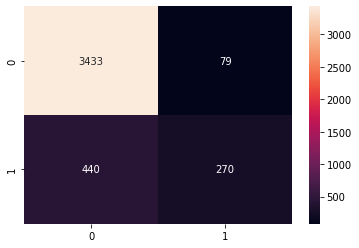

In [115]:
rf_mat = confusion_matrix(y_train,train_pred1)
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
pred2 = clf.predict(x_test)
train_pred2=clf.predict(x_train)

In [117]:
accuracy_score(y_test,pred2)

0.8274147727272727

In [118]:
results = confusion_matrix(y_test,pred2)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test,pred2))
print ('Classification Report : ')
print (classification_report(y_test,pred2))
print('AUC-ROC:',roc_auc_score(y_test,pred2))
print('LOGLOSS Value is',log_loss(y_test,pred2))

Confusion Matrix :
[[1115   55]
 [ 188   50]]
Accuracy Score is 0.8274147727272727
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1170
           1       0.48      0.21      0.29       238

    accuracy                           0.83      1408
   macro avg       0.67      0.58      0.60      1408
weighted avg       0.79      0.83      0.80      1408

AUC-ROC: 0.5815377433024491
LOGLOSS Value is 5.960913808112185


In [119]:
results = confusion_matrix(y_train,train_pred2)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred2))
print ('Classification Report : ')
print (classification_report(y_train,train_pred2))
print('AUC-ROC:',roc_auc_score(y_train,train_pred2))
print('LOGLOSS Value is',log_loss(y_train,train_pred2))

Confusion Matrix :
[[3460   52]
 [ 467  243]]
Accuracy Score is 0.8770724774988157
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3512
           1       0.82      0.34      0.48       710

    accuracy                           0.88      4222
   macro avg       0.85      0.66      0.71      4222
weighted avg       0.87      0.88      0.86      4222

AUC-ROC: 0.663723571497321
LOGLOSS Value is 4.245776060640695


In [120]:
from xgboost import XGBClassifier

In [121]:
XG_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [122]:
XG_model.fit(x_train, y_train)
pred3 = clf.predict(x_test)

In [123]:
accuracy_score(y_test,pred3)

0.8274147727272727

In [124]:
train_pred3 = clf.predict(x_train)

In [125]:
accuracy_score(y_train,train_pred3)

0.8770724774988157

# Support Vector Classifier

In [126]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [127]:
# from sklearn.model_selection import GridSearchCV
# #set the parameters
# parameters = {"C": [32] ,"kernel":["poly","rbf"]} #["linear","poly","rbf","sigmoid"]
# svc = SVC()
# svc_grid = GridSearchCV(svc,parameters, cv=5)

# svc_grid.fit(x_train, y_train)

In [128]:
# print(svc_grid.best_params_)
# print(svc_grid.best_estimator_)

In [129]:
from sklearn.svm import SVC
svc = SVC(C=32,kernel="rbf")
svc.fit(x_train, y_train)

SVC(C=32)

In [130]:
pred4 = svc.predict(x_test)
train_pred4=svc.predict(x_train)

In [131]:
accuracy_score(y_test,pred4)

0.8345170454545454

In [132]:
results = confusion_matrix(y_test,pred4)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test,pred4))
print ('Classification Report : ')
print (classification_report(y_test,pred4))

Confusion Matrix :
[[1169    1]
 [ 232    6]]
Accuracy Score is 0.8345170454545454
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1170
           1       0.86      0.03      0.05       238

    accuracy                           0.83      1408
   macro avg       0.85      0.51      0.48      1408
weighted avg       0.84      0.83      0.76      1408



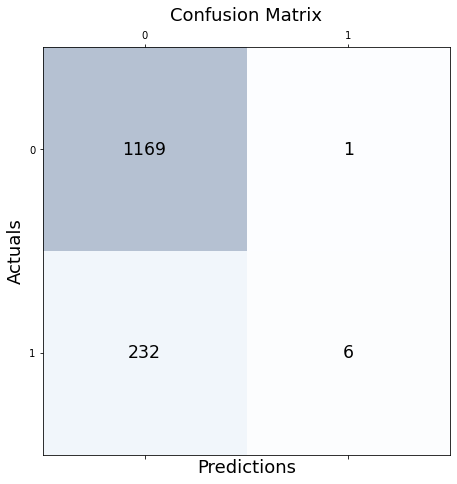

In [133]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(results, cmap=plt.cm.Blues, alpha=0.3)
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        ax.text(x=j, y=i,s=results[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [134]:
accuracy_score(y_train,train_pred4)

0.8387020369493131

In [135]:
results = confusion_matrix(y_train,train_pred4)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred4))
print ('Classification Report : ')
print (classification_report(y_train,train_pred4))

Confusion Matrix :
[[3512    0]
 [ 681   29]]
Accuracy Score is 0.8387020369493131
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3512
           1       1.00      0.04      0.08       710

    accuracy                           0.84      4222
   macro avg       0.92      0.52      0.50      4222
weighted avg       0.86      0.84      0.77      4222



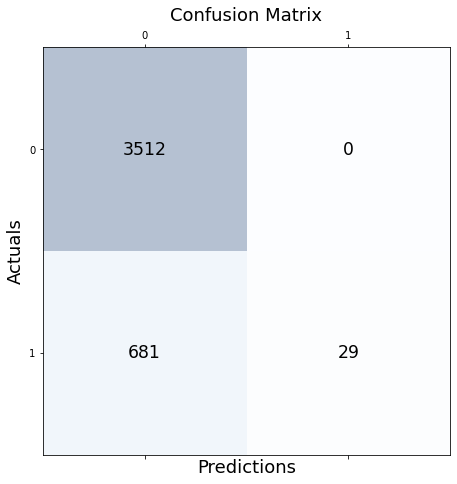

In [136]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(results, cmap=plt.cm.Blues, alpha=0.3)
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        ax.text(x=j, y=i,s=results[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()